<a href="https://colab.research.google.com/github/itsnikhil-96/js/blob/main/ML_PROJECT_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

Importing dataset

In [ ]:
data = pd.read_csv("train.csv")

Printing dataset

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


printing number of rows and columns

In [ ]:
data.shape

(10886, 12)

printing data info

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


Dealing with Null Values

In [ ]:
data.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


printing columns

In [ ]:
print(data.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


First 5 rows

In [ ]:
print(data.head())

           datetime  season  holiday  workingday  weather  temp   atemp  \
0  01-01-2011 00:00       1        0           0        1  9.84  14.395   
1  01-01-2011 01:00       1        0           0        1  9.02  13.635   
2  01-01-2011 02:00       1        0           0        1  9.02  13.635   
3  01-01-2011 03:00       1        0           0        1  9.84  14.395   
4  01-01-2011 04:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


Performing Exploratory Data Analysis

In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Changing data (string) to date format for easy extraction of month,date,year,hour,minute

In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y %H:%M', errors='coerce')

In [ ]:
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
data['weekday'] = data['datetime'].dt.weekday
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

Visualizing the Demand using multiple variables

Demand per day of the week

<ipython-input-12-2822511237a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='weekday', y='count', palette='rainbow')


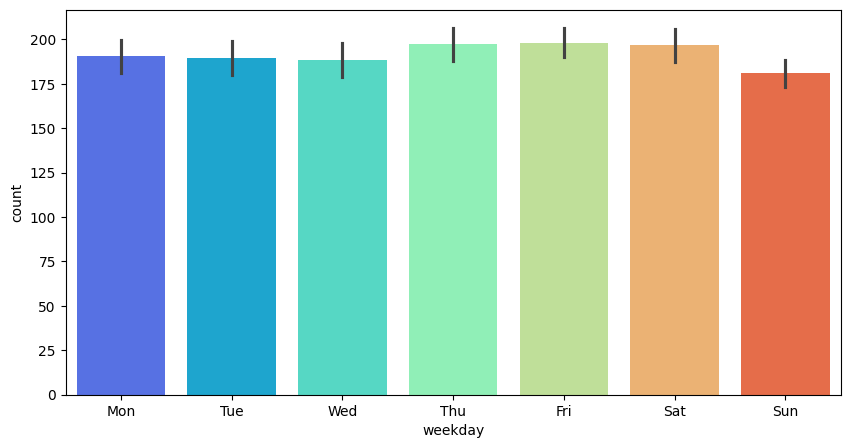

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='weekday', y='count', palette='rainbow')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Demand per month

<ipython-input-13-beb5fd48457e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='month', y = 'count', palette = 'rainbow');


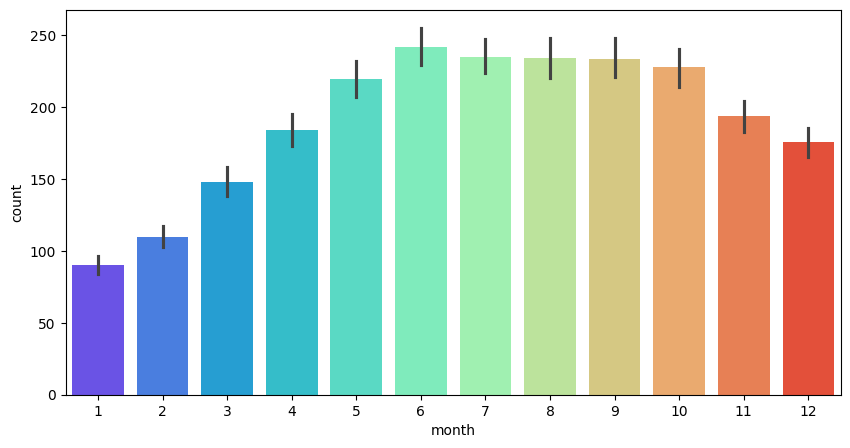

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='month', y = 'count', palette = 'rainbow');

Demand per hour

<ipython-input-14-b7d244b731c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, x = 'hour', y = 'count', palette = 'rainbow');


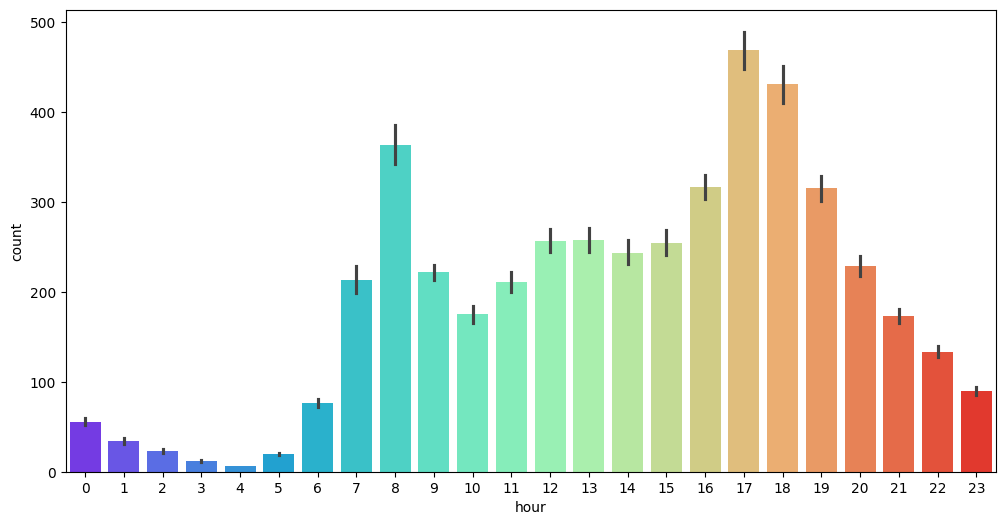

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data = data, x = 'hour', y = 'count', palette = 'rainbow');

Demand per season

<ipython-input-15-f43ec056425a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, x = 'season', y = 'count', palette = 'rainbow');


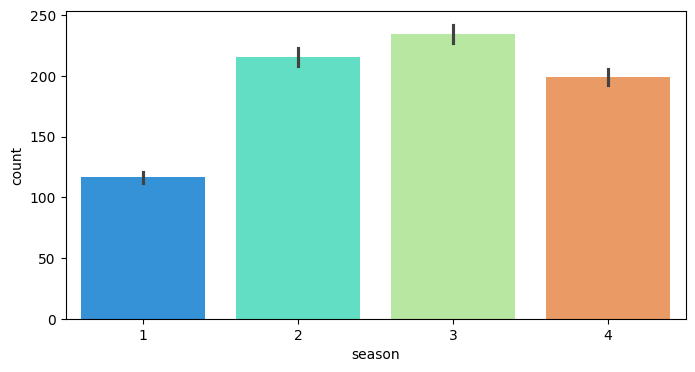

In [ ]:
plt.figure(figsize = (8,4))
sns.barplot(data = data, x = 'season', y = 'count', palette = 'rainbow');

Demand as per holidays

<ipython-input-16-f4ed92ebb06d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, x = 'holiday', y = 'count', palette = 'rainbow');


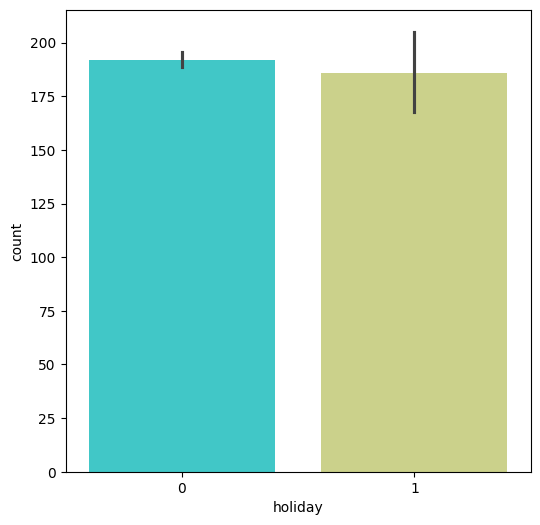

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(data = data, x = 'holiday', y = 'count', palette = 'rainbow');

Correlation Matrix of Bike Sharing Features

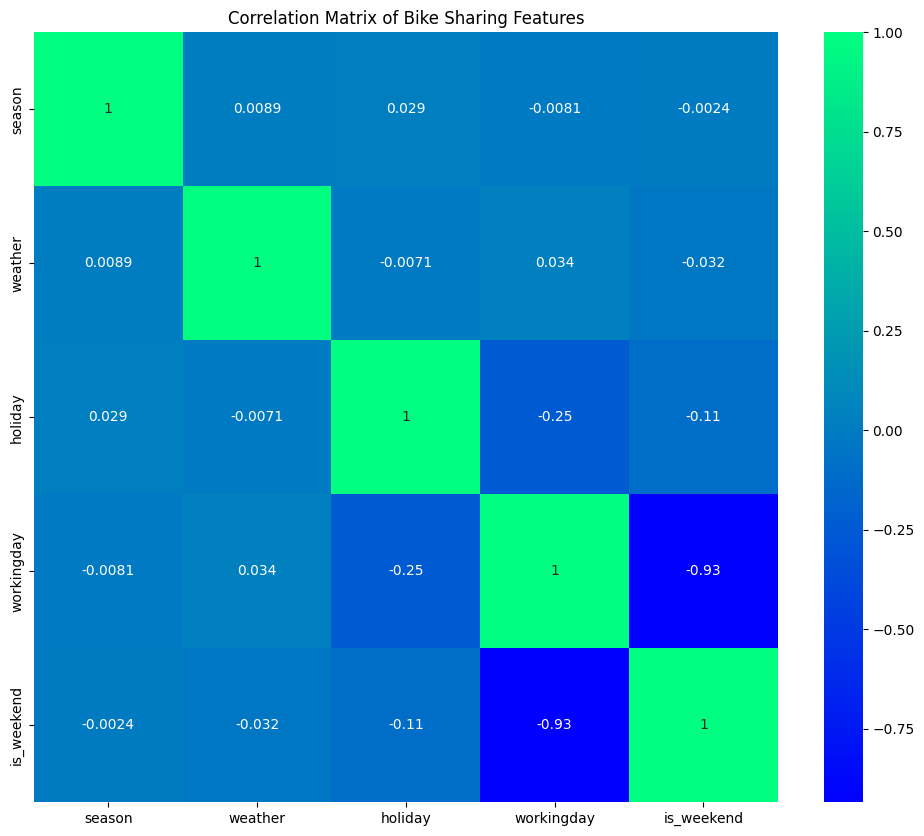

In [ ]:
corrdata = data[['season','weather', 'holiday', 'workingday', 'is_weekend']]
corrmat = corrdata.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corrmat, annot=True, cmap='winter');
plt.title('Correlation Matrix of Bike Sharing Features')
plt.show()

Feature Engineering

In [ ]:
data['humidity_windspeed_ratio'] = data['humidity'] / (data['windspeed'] + 1)
data['temp_atemp_diff'] = data['temp'] - data['atemp']

In [ ]:
data['prev_hour_count'] = data['count'].shift(1).fillna(method='bfill')

<ipython-input-19-135cadb0addf>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['prev_hour_count'] = data['count'].shift(1).fillna(method='bfill')


Correlation Matrix of All Features

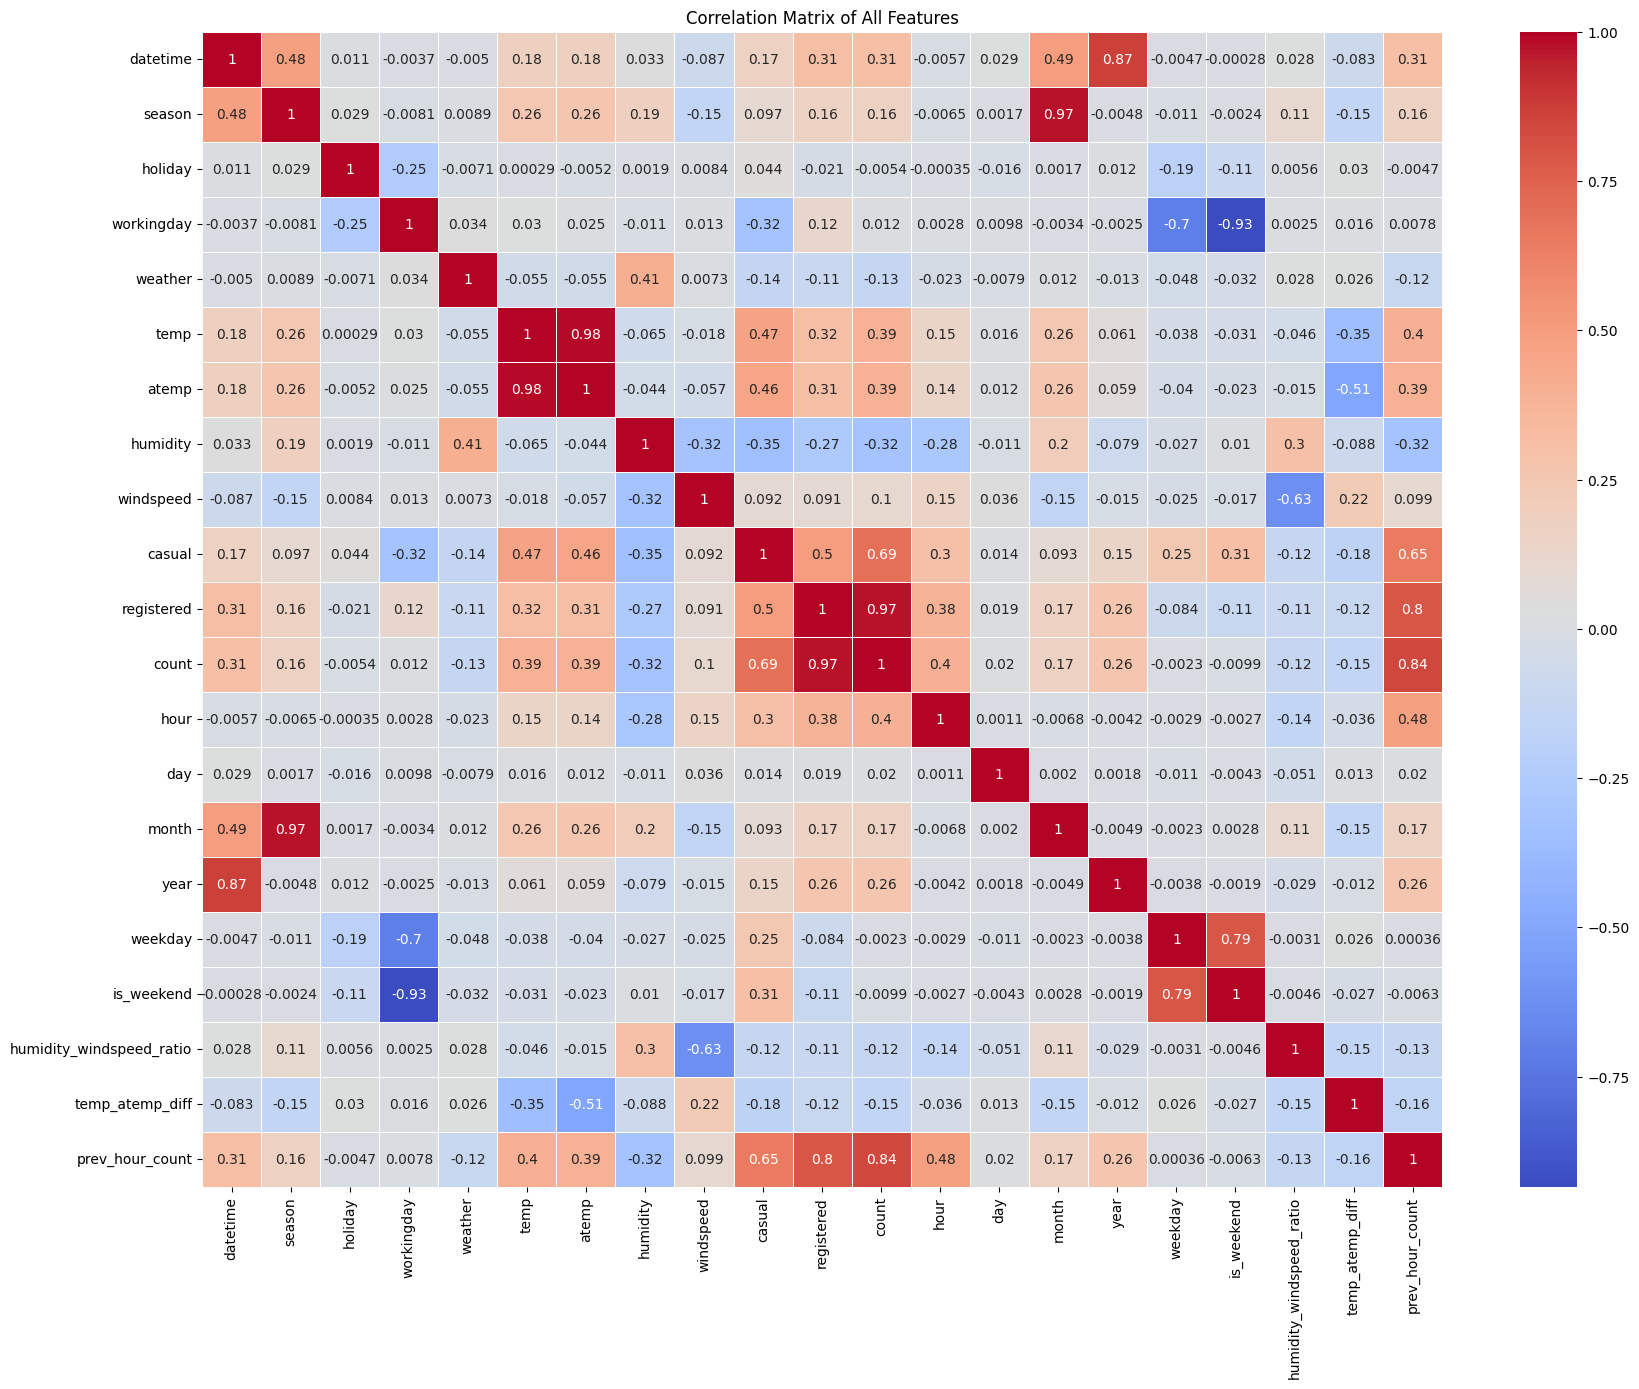

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of All Features")
plt.show()

Scaling Continuous Variables

In [ ]:
scaler = MinMaxScaler()
data[['temp', 'atemp', 'humidity', 'windspeed', 'humidity_windspeed_ratio']] = scaler.fit_transform(
    data[['temp', 'atemp', 'humidity', 'windspeed', 'humidity_windspeed_ratio']]
)

Log Transformation of Target Variable

In [ ]:
data['count'] = np.log1p(data['count'])

In [ ]:
X = data.drop(columns=['datetime', 'count', 'casual', 'registered'])
y = data['count']
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year,weekday,is_weekend,humidity_windspeed_ratio,temp_atemp_diff,prev_hour_count
0,1,0,0,1,0.224490,0.305068,0.81,0.000000,0,1,1,2011,5,1,0.810000,-4.555,16.0
1,1,0,0,1,0.204082,0.288064,0.80,0.000000,1,1,1,2011,5,1,0.800000,-4.615,16.0
2,1,0,0,1,0.204082,0.288064,0.80,0.000000,2,1,1,2011,5,1,0.800000,-4.615,40.0
3,1,0,0,1,0.224490,0.305068,0.75,0.000000,3,1,1,2011,5,1,0.750000,-4.555,32.0
4,1,0,0,1,0.224490,0.305068,0.75,0.000000,4,1,1,2011,5,1,0.750000,-4.555,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,0.367347,0.423649,0.50,0.456213,19,19,12,2012,2,0,0.018517,-4.115,569.0
10882,4,0,1,1,0.346939,0.372860,0.57,0.263195,20,19,12,2012,2,0,0.035622,-2.665,336.0
10883,4,0,1,1,0.326531,0.338964,0.61,0.263195,21,19,12,2012,2,0,0.038122,-1.970,241.0
10884,4,0,1,1,0.326531,0.372860,0.61,0.105325,22,19,12,2012,2,0,0.087103,-3.485,168.0


Split dataset into training and testing sets (80% train, 20% test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Random Forest Algorithm**

Train Initial Random Forest Model

In [ ]:
rf_model = RandomForestRegressor(n_estimators=8, max_depth=3, random_state=1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

Evaluate Model Performance

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f'Optimized Random Forest RMSE: {rmse}')
print(f'Optimized Random Forest Accuracy (R² Score): {r2:.4f}')

Mean Absolute Error (MAE): 0.3255566631024481
Mean Squared Error (MSE): 0.20581519790342684
Optimized Random Forest RMSE: 0.45366859920367736
Optimized Random Forest Accuracy (R² Score): 0.9000


In [ ]:
from sklearn.metrics import classification_report
bins = [0, 5, 10, 15]
y_pred_labels = np.digitize(y_pred, bins)
y_test_labels = np.digitize(y_test, bins)
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           1       0.97      0.71      0.82      1067
           2       0.78      0.98      0.87      1111

    accuracy                           0.85      2178
   macro avg       0.87      0.84      0.84      2178
weighted avg       0.87      0.85      0.84      2178



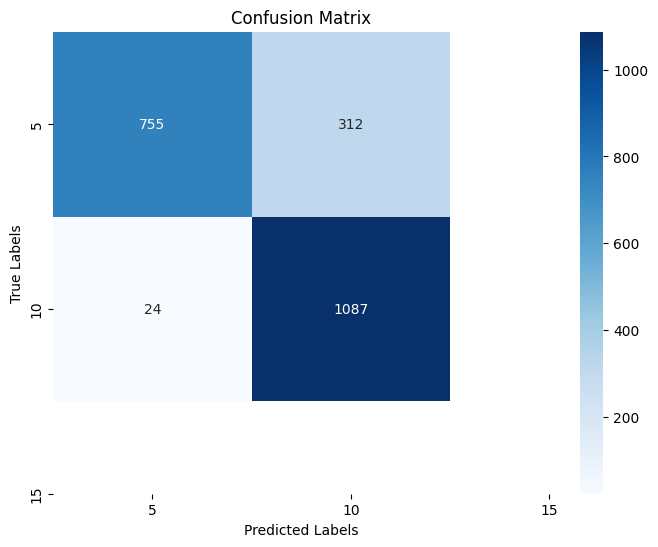

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=bins[1:], yticklabels=bins[1:])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Using Linear Regression**

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=1)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
accuracy_poly = model_poly.score(X_test_poly, y_test)
print(f"Accuracy with Polynomial Features: {accuracy_poly}")

Accuracy with Polynomial Features: 0.7923633950034735


Using ANN Algorithm

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='logistic', solver='adam', max_iter=60, random_state=1)
ann_model.fit(X_train_scaled, y_train)
y_pred_ann = ann_model.predict(X_test_scaled)
r2_ann = r2_score(y_test, y_pred_ann)
print(f"ANN Accuracy (R^2 Score): {r2_ann}")

ANN Accuracy (R^2 Score): 0.8137553403479965


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


Using SVM Algorithm

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVR(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"SVM Accuracy (R^2 Score): {r2_svm}")
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
print(f"SVM RMSE: {rmse_svm}")

SVM Accuracy (R^2 Score): 0.854683762945378
SVM RMSE: 0.5441087763108614


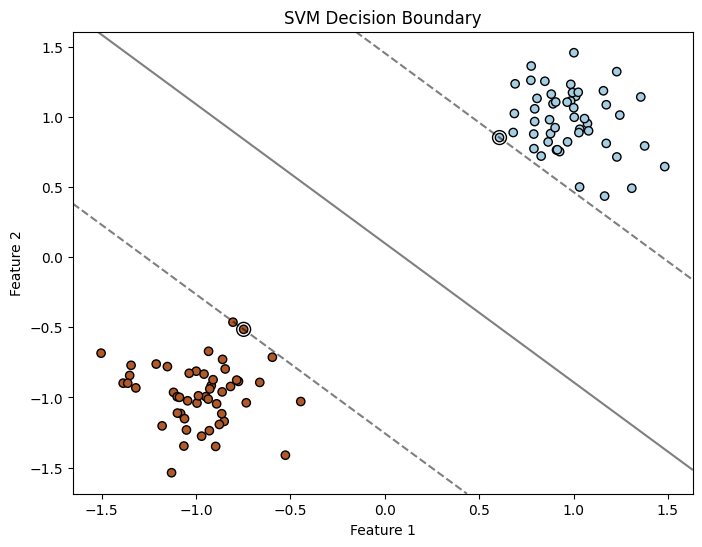

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
X, y = make_blobs(n_samples=100, centers=2, random_state=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm = SVC(kernel='linear', C=1)
svm.fit(X_scaled, y)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Using KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['datetime', 'count', 'casual', 'registered']), data['count'], test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"KNN R^2 Score: {r2}")

KNN R^2 Score: 0.9000171590926226


In [ ]:
# prompt: use decison tree and print acurayc

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
# Assuming X_train, X_test, y_train, y_test are defined from previous code

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=1)  # You can adjust hyperparameters
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

#Decision Tree accuracy can not be calculated directly. Using bins to discretize and calculate the accuracy
bins = [0, 5, 10, 15]
y_pred_dt_labels = np.digitize(y_pred_dt, bins)
y_test_labels = np.digitize(y_test, bins)

# Evaluate the model
accuracy_dt = accuracy_score(y_test_labels, y_pred_dt_labels)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.9329660238751147
